In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

# Stacked Bar Plot

In [137]:
feature_rank = pd.read_csv("C:/Users/seungmi/Desktop/feature_rank.csv")

In [144]:
# split the data based on the t*
under_thres = feature_rank[feature_rank['rank'] < 0.17*len(feature_rank)]
over_thres = feature_rank[feature_rank['rank'] >= 0.17*len(feature_rank)]

In [178]:
def stacked_thres(data,activity):
    f_ranks = data[data['activity'] == activity]['feature_rank']
    fmin = []
    fmed = []
    fmax = []

    for i in range(len(f_ranks)):
        ranks = re.findall('\d+', f_ranks.iloc[i])
        fmin.append(ranks[0])
        fmed.append(ranks[1])
        fmax.append(ranks[2])
    d1 = pd.DataFrame([{x:fmin.count(x) for x in fmin}])
    d2 = pd.DataFrame([{x:fmed.count(x) for x in fmed}])
    d3 = pd.DataFrame([{x:fmax.count(x) for x in fmax}])
    df = pd.concat([d1,d2,d3]).fillna(0).set_index([['min','med','max']])
    return df

In [209]:
# stacked bar plot 
def stacked_bar(data):
    plt.figure()
    for i in range(len(feature_rank.activity.unique())):
        activity = feature_rank.activity.unique()[i]
        df = stacked_thres(data,activity)
        ax = plt.subplot(2,2,i+1)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        ax = df.plot(kind="bar",linewidth=0, stacked=True,
                              ax=ax,legend=False,grid=False)
        ax.set_xticklabels(df.index, rotation = 0)
        plt.title(activity)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.suptitle("Feature Effects on Scores Against Activities")
    plt.show()

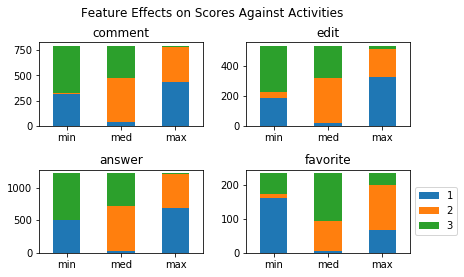

In [210]:
stacked_bar(over_thres) #over threshold

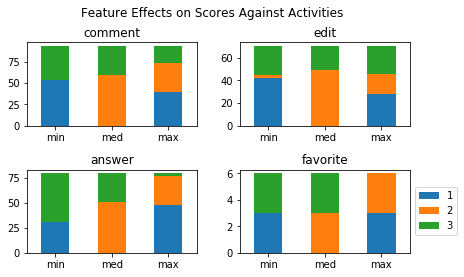

In [211]:
stacked_bar(under_thres) #under threshold

In [3]:
outlier_activities = pd.read_csv("../../160-Stackoverflow-Data/residuals/data/outlier_activities.csv")
outlier_question = pd.read_csv("../../160-Stackoverflow-Data/residuals/data/outlier_question.csv")

In [4]:
outlier_question

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Id,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
0,2,2,67737,11209935,NaN,NaN,2012-06-26T14:46:59.163,2,10504.0,<p>I 'm getting the date in the following form...,964819.0,NaN,904049.0,Changing one date format to another,java date format,4.0,1,NaN,NaN
1,13,13,1296,8741054,NaN,8741143.0,2012-01-05T10:37:18.253,0,1732.0,<p>How to resolve warning message coming in ec...,374199.0,NaN,1977903.0,Eclipse Warning message,java eclipse,5.0,6,0.0,NaN
2,14,14,43834,10314404,NaN,10314451.0,2012-04-25T11:09:04.190,-2,2842.0,<p>I am working on Galaxy Nexus(Android 4.0.3)...,896579.0,NaN,136445.0,How to save captured image to gallery,java android emulation samsung-mobile,2.0,1,NaN,NaN
3,23,23,68460,11239086,NaN,11239128.0,2012-06-28T06:23:16.197,132,291504.0,<blockquote>\r\r\r\n <p><strong>Possible Dupl...,1439243.0,NaN,-1.0,java.lang.UnsupportedClassVersionError Unsuppo...,java,7.0,0,33.0,2013-02-04T07:29:18.850
4,24,24,20678,9484820,NaN,NaN,2012-02-28T15:33:14.167,-1,1488.0,<p>I have an html file called basic.html and w...,1178770.0,NaN,1400768.0,Regex - find various strings from an HTML file,java html regex,2.0,4,NaN,2014-09-27T14:44:12.220
5,25,25,7965,8998383,NaN,8998417.0,2012-01-25T05:44:44.303,3,516.0,<p>I use a <code>PriorityBlockingQueue</code> ...,976646.0,NaN,230513.0,Re ordering of a priorityblockingqueue after a...,java queue,1.0,0,1.0,NaN
6,32,32,41094,10216014,NaN,10221981.0,2012-04-18T18:53:39.423,21,32389.0,<p>My application must perform R operations su...,1340020.0,NaN,59087.0,Simple program to call R from Java using Eclip...,java eclipse r rserve,4.0,0,13.0,NaN
7,35,35,2852,8799282,NaN,8803011.0,2012-01-10T06:13:30.450,-1,2484.0,"<p>with vmware web service SDK and Axis 1.4, E...",677823.0,NaN,1965870.0,java program for managing the ESXi with web se...,java vmware esxi,2.0,0,NaN,NaN
8,36,36,8479,9018589,NaN,9018678.0,2012-01-26T13:15:02.987,0,1208.0,<p>I have 2 classes <code>Engine.java</code> a...,1092450.0,NaN,714968.0,Accessing Swing components of another class wi...,java swing methods components parent,4.0,1,NaN,NaN
9,42,42,64944,11098013,NaN,11098831.0,2012-06-19T09:20:09.203,8,19289.0,<p>I have issue with:</p>\r\r\r\n\r\r\r\n<pre>...,213158.0,NaN,1061499.0,spring <form:checkboxes> tag and css class,java jsp,3.0,2,4.0,NaN


In [5]:
outlier_activities.head()

,Unnamed: 0,activity,q_num,rank,score,userid
0,10,answer,2,18145,0.001007,1429832
1,48,answer,13,36285,0.000000,1291727
2,55,comment,13,11534,0.001179,1977903
3,56,edit,13,11534,0.001179,1977903
4,57,answer,14,49244,0.000000,4993880


In [6]:
users_answered = outlier_activities[outlier_activities.activity == "answer"]

In [7]:
users_answered.head()

,Unnamed: 0,activity,q_num,rank,score,userid
0,10,answer,2,18145,0.001007,1429832
1,48,answer,13,36285,0.000000,1291727
4,57,answer,14,49244,0.000000,4993880
5,105,answer,23,56973,0.000000,1623624
6,106,answer,23,43990,0.000000,1870570


In [8]:
grouped = users_answered.groupby(users_answered.userid)
num_missed_user = grouped.size()
print(num_missed_user[num_missed_user > 1]) # almost all the users above the threshold only detected once
print(len(num_missed_user)) # 212, the number of users who did answer but we couldn't detect them

userid
4669617    2
dtype: int64
218


In [9]:
Users = pd.read_csv("../../160-Stackoverflow-Data/train_test/raw_query/Users.csv")

In [10]:
Users.tail()

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
59191,9421723,11,2018-02-28T02:15:12.180,idontknowwhatiamtalkingabout,2018-03-10T20:20:57.933,NaN,NaN,NaN,NaN,1,0,0,13037259,NaN
59192,9427004,1,2018-03-01T04:22:08.210,user9427004,2018-03-10T18:35:10.737,NaN,NaN,NaN,NaN,0,0,0,13044838,NaN
59193,9446684,1,2018-03-05T15:56:36.757,debanga medhi,2018-03-08T16:30:24.563,NaN,NaN,NaN,NaN,0,0,0,13073918,NaN
59194,9463264,11,2018-03-08T16:15:18.027,Mrseguin,2018-03-09T16:56:14.843,NaN,NaN,NaN,NaN,0,0,0,13097900,NaN
59195,9464197,1,2018-03-08T19:49:11.937,Sujal Shelke,2018-03-09T20:51:23.280,NaN,NaN,NaN,NaN,0,0,0,13099281,https://lh5.googleusercontent.com/-S6_B7QefsRM...


In [11]:
Posts = pd.read_csv('../../160-Stackoverflow-Data/train_test/raw_query/Posts.csv' ,\
                    dtype = {'LastEditorDisplayName': str, 'Tags': str})

C:\Users\seungmi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
Answers = Posts[Posts.PostTypeId == 2]

In [13]:
Answers.head()

,Unnamed: 0,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
69312,69312,8691334,2,8691270.0,NaN,2012-01-01T01:00:17.023,4,NaN,"<p>If your goal is to center a component, then...",535871.0,...,NaN,2012-01-01T01:19:12.777,2012-01-01T01:19:12.777,NaN,NaN,NaN,NaN,2,NaN,NaN
69313,69313,8691341,2,8691225.0,NaN,2012-01-01T01:03:04.670,1,NaN,<ol>\r\r\n<li><p>Check the software firewall o...,139985.0,...,NaN,NaN,2012-01-01T01:03:04.670,NaN,NaN,NaN,NaN,1,NaN,NaN
69314,69314,8691449,2,8691436.0,NaN,2012-01-01T01:41:31.107,2,NaN,<p>The traditional <code>for</code> loop versi...,535871.0,...,NaN,NaN,2012-01-01T01:41:31.107,NaN,NaN,NaN,NaN,0,NaN,NaN
69315,69315,8691450,2,8691436.0,NaN,2012-01-01T01:42:03.593,2,NaN,<p>You are going to want to use the following....,974000.0,...,NaN,NaN,2012-01-01T01:42:03.593,NaN,NaN,NaN,NaN,0,NaN,NaN
69316,69316,8691503,2,8691456.0,NaN,2012-01-01T02:07:39.687,2,NaN,<p>Don't use the <code>UrlEncodedFormEntity</c...,751158.0,...,NaN,NaN,2012-01-01T02:07:39.687,NaN,NaN,NaN,NaN,3,NaN,NaN


In [14]:
num_answers_user = Answers.groupby(Answers['OwnerUserId']).size()

In [15]:
# build a dataframe that indicates the number of missed answers and total answers of users that we couldn't detect at least one answer
missed_user_table = pd.merge(num_missed_user.to_frame(), num_answers_user.to_frame(), left_index = True, right_index = True)  
missed_user_table.columns = ['missed', 'total']

In [16]:
missed_user_table

,missed,total
5746.0,1,1
14204.0,1,1
15806.0,1,1
20520.0,1,2
35049.0,1,1
35989.0,1,1
113794.0,1,1
136913.0,1,3
151770.0,1,1
190652.0,1,1


In [17]:
len(missed_user_table[missed_user_table.total == missed_user_table.missed]) 
# 159 users of 212 who did answer only once and we couldn't detect them
# 53 users of 212 who did answer more than twice

159

In [18]:
# focus on those 159 users first
single_ans = (missed_user_table[missed_user_table.total == missed_user_table.missed]).index # user_id

In [19]:
single_ans_users = Users[Users['Id'].isin(single_ans)]

In [23]:
single_ans_users.sort_values(['Reputation'], ascending = False)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
12877,541136,123163,2010-12-13T21:54:43.753,Aaron Hall,2018-03-11T03:12:30.807,https://aaronchall.github.io/,"NYC, NY, United States",39.0,"<h3><a href=""http://meta.stackoverflow.com/q/3...",29283,2979,947,258754,https://i.stack.imgur.com/wftMn.jpg?s=128&g=1
24371,981959,119991,2011-10-06T10:00:55.320,Jonathan Wakely,2018-03-09T02:08:45.977,http://advogato.org/person/redi/,"London, United Kingdom",NaN,"<p><img src=""https://i.imgur.com/A0xcXRD.jpg"" ...",12034,6679,1186,956801,NaN
2842,113794,46531,2009-05-28T14:53:32.497,Rubens Farias,2018-03-05T17:25:42.603,http://rubensfarias.blogspot.com/,"Sao Paulo, Brazil",41.0,"<p>Software Architect, São Paulo, Brazil <br /...",2894,1597,92,39452,NaN
17624,733798,13368,2011-05-02T00:49:59.047,IAmTimCorey,2018-03-11T04:47:55.953,http://www.timothycorey.com,"Clarks Summit, PA",40.0,<p>I have been a software developer and databa...,1110,1724,10,380038,NaN
48566,1472331,10665,2012-06-21T13:55:44.760,Luis,2018-03-09T15:23:14.313,NaN,NaN,NaN,NaN,373,88,5,1588478,NaN
48463,1469259,10423,2012-06-20T12:35:17.077,CupawnTae,2018-03-10T22:34:25.517,NaN,Ireland,NaN,NaN,1005,752,29,1019629,NaN
1167,35989,7828,2008-11-09T20:27:51.163,Dipstick,2018-03-10T23:55:29.227,NaN,NaN,NaN,NaN,539,112,17,16497,NaN
53350,2544089,6185,2013-07-02T19:31:17.483,Mario Rossi,2018-03-09T04:32:49.587,NaN,"Mississauga, ON, Canada",57.0,<p>38 years experience and more than 30 progra...,394,92,51,2997947,NaN
5957,252871,5675,2010-01-18T01:26:01.437,SteelBytes,2018-03-11T03:50:06.923,http://www.SteelBytes.com,Australia,NaN,NaN,372,123,10,92247,https://i.stack.imgur.com/kyo5Y.jpg
33699,1193945,5605,2012-02-07T06:04:05.320,John Dewey,2017-02-25T05:11:18.523,NaN,"Anna, TX, United States",NaN,<p>I write SQL Server ETL packages for a livin...,243,61,6,1228964,https://i.stack.imgur.com/jLp82.png


In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

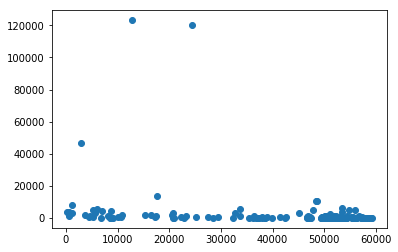

In [31]:
plt.scatter(single_ans_users.index,single_ans_users['Reputation'])
plt.show() # only a few users have great reputations

In [37]:
# Focusing on those missed users with top 3 reputations
top3 = single_ans_users.sort_values(['Reputation'], ascending = False).head(3) 
# inspecting manually

In [45]:
top3

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
12877,541136,123163,2010-12-13T21:54:43.753,Aaron Hall,2018-03-11T03:12:30.807,https://aaronchall.github.io/,"NYC, NY, United States",39.0,"<h3><a href=""http://meta.stackoverflow.com/q/3...",29283,2979,947,258754,https://i.stack.imgur.com/wftMn.jpg?s=128&g=1
24371,981959,119991,2011-10-06T10:00:55.320,Jonathan Wakely,2018-03-09T02:08:45.977,http://advogato.org/person/redi/,"London, United Kingdom",NaN,"<p><img src=""https://i.imgur.com/A0xcXRD.jpg"" ...",12034,6679,1186,956801,NaN
2842,113794,46531,2009-05-28T14:53:32.497,Rubens Farias,2018-03-05T17:25:42.603,http://rubensfarias.blogspot.com/,"Sao Paulo, Brazil",41.0,"<p>Software Architect, São Paulo, Brazil <br /...",2894,1597,92,39452,NaN


In [76]:
third_posts = Posts[Posts.OwnerUserId == top3.Id.iloc[2]]
Posts[Posts.Id == third_posts.ParentId.iloc[0]]#['Tags'] # to find out tags that the third top reputation user answered
# it matches with the field that this user has expertise at

,Unnamed: 0,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
61448,61448,10964757,1,NaN,10996723.0,2012-06-09T21:35:24.060,0,998.0,<p>I'm trying to send a very basic XML string ...,1435761.0,...,NaN,NaN,2012-06-12T12:32:05.090,NaN,Trouble sending XML string to Java webservice ...,java,1.0,2,0.0,NaN


In [57]:
users_answered[users_answered.userid == top3.Id.iloc[2]] # but this user's score in this posting is so low

,Unnamed: 0,activity,q_num,rank,score,userid
62,572,answer,130,17093,0.00098,113794


In [86]:
q800 = pd.read_csv("../../160-Stackoverflow-Data/residuals/data/residuals_800_q.csv")
q130_feature_mat = pd.read_csv("../../160-Stackoverflow-Data/residuals/feature_matrices/q_130_feature_matrix.csv"
                               , names = ["userid","f1","f2","f3","total"])

In [87]:
q_130 = q800[q800.q_num == 130]

In [88]:
q130_feature_mat.head()

,userid,f1,f2,f3,total
0,418556.0,0.018391,1.000000,1.000000,2.018391
1,522444.0,0.083056,0.543775,0.498024,1.124855
2,571407.0,0.038035,0.576923,0.470818,1.085776
3,57695.0,0.014286,0.611589,0.393080,1.018955
4,492405.0,1.000000,0.003289,0.002668,1.005958


In [73]:
q_130 # why the second guy ranked higher than the top reputation user

,activity,q_num,rank,score,userid
572,answer,130,17093,0.000980,113794
573,comment,130,2931,0.201312,1435761
574,comment,130,17093,0.000980,113794


In [74]:
Users[Users.Id == 1435761]

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,Age,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl
47062,1435761,139,2012-06-04T18:11:42.043,Ryan H,2014-09-13T01:02:50.407,NaN,NaN,NaN,NaN,28,10,0,1541121,NaN


In [75]:
Posts[Posts.OwnerUserId == 1435761] # asked five times

,Unnamed: 0,Id,PostTypeId,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,CommunityOwnedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
59468,59468,10886460,1,NaN,10886503.0,2012-06-04T18:41:12.327,0,3304.0,<p>I'm attempting to hold a static list of Fut...,1435761.0,...,NaN,NaN,2012-06-04T18:55:09.473,NaN,"Using Map of Futures, how do I notify() a sing...",java concurrency notify promise,2.0,2,NaN,NaN
59819,59819,10900351,1,NaN,10900481.0,2012-06-05T15:36:22.160,1,157.0,<p>I have a long-running task (report) which w...,1435761.0,...,NaN,NaN,2012-06-05T15:44:03.990,NaN,Solution for Asynchronous Servlets in versions...,java servlets asynchronous,1.0,1,1.0,NaN
61448,61448,10964757,1,NaN,10996723.0,2012-06-09T21:35:24.060,0,998.0,<p>I'm trying to send a very basic XML string ...,1435761.0,...,NaN,NaN,2012-06-12T12:32:05.090,NaN,Trouble sending XML string to Java webservice ...,java,1.0,2,0.0,NaN
65255,65255,11110479,1,NaN,NaN,2012-06-19T22:35:57.957,1,90.0,<p>I'm using the Provider implementation of <a...,1435761.0,...,NaN,2012-06-20T02:33:33.533,2012-06-20T02:33:33.533,NaN,Logging XML request in Java-WS invoke method,java xml logging,0.0,2,NaN,NaN
66498,66498,11158454,1,NaN,11158522.0,2012-06-22T14:42:25.930,6,10823.0,<p>I push my Futures from a ExecutorService in...,1435761.0,...,NaN,2017-05-06T13:21:16.563,2017-05-06T13:21:16.563,NaN,Future task of ExecutorService not truly cance...,java concurrency executorservice promise,2.0,0,5.0,NaN


In [89]:
for item in q_130.userid:
    print(q130_feature_mat[q130_feature_mat.userid == item]) 

         userid   f1        f2        f3    total
17093  113794.0  0.0  0.000759  0.000221  0.00098
         userid   f1        f2        f3     total
2931  1435761.0  0.2  0.000759  0.000553  0.201312
         userid   f1        f2        f3    total
17093  113794.0  0.0  0.000759  0.000221  0.00098


In [35]:
len(users_answered[users_answered['score'] == 0]) #137 of 219 users' scores are zero

137

In [58]:
missed_user_table[missed_user_table.total != missed_user_table.missed]

,missed,total
20520.0,1,2
336423.0,1,5
400251.0,1,2
403950.0,1,2
410414.0,1,2
516188.0,1,2
525203.0,1,2
552733.0,1,2
562497.0,1,3
620249.0,1,2
